### Top 

In [1]:
# NLP Project 
# News Text Classifier 

In [ ]:
# Import all necessary libraries 

In [164]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(0)

In [165]:
#importing the data 

In [166]:
dftest=pd.read_json('~/Desktop/nlp_project/News_Category_Dataset_v2.json', lines = True)

In [167]:
# viewing and inspecting the data 

In [168]:
dftest.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [55]:
print(dftest.headline[0])

There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV


In [56]:
print(dftest.short_description[0])

She left her husband. He killed their children. Just another day in America.


In [169]:
df=dftest

In [170]:
df.describe()

,authors,category,date,headline,link,short_description
count,200853,200853,200853,200853,200853,200853
unique,27993,41,2309,199344,200812,178353
top,,POLITICS,2013-01-17 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://www.nytim...,
freq,36620,32739,100,90,2,19712
first,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


In [171]:
df['category'].nunique()

41

In [172]:
df.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [ ]:
# should minimize number of categories 
# should merge headline and description into new column called summary 

In [ ]:
# Just pick 4 categories: Crime, Business , Sports , Healthy Living (aka Health) 

In [21]:
categories = ['BUSINESS', 'SPORTS', 'HEALTHY LIVING', 'CRIME']

In [ ]:
level_map = {1: 'high', 2: 'medium', 3: 'low'}
df['c_level'] = df['c'].map(level_map)
#This is a cool command to do easy data transformations. You first define a dictionary with 
#‘keys’ being the old values and ‘values’ being the new values.

In [173]:
newdf = df['category'].isin(['BUSINESS', 'SPORTS', 'HEALTHY LIVING', 'CRIME']) 


In [94]:
newdf.head()

0     True
1    False
2    False
3    False
4    False
Name: category, dtype: bool

In [174]:
df2=df[newdf]

In [175]:
df2.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
32,Carla Herreria,CRIME,2018-05-25,Rachel Dolezal Faces Felony Charges For Welfar...,https://www.huffingtonpost.com/entry/rachel-do...,"State prosecutors say almost $84,000 had been ..."
40,Jenna Amatulli,CRIME,2018-05-25,"Man Faces Charges After Pulling Knife, Stun Gu...",https://www.huffingtonpost.com/entry/man-knife...,"“We thought we were going to die,"" one of the ..."
42,Marina Fang,CRIME,2018-05-25,2 People Injured In Indiana School Shooting,https://www.huffingtonpost.com/entry/indiana-m...,"A male student, believed to be the suspect, ha..."
80,Ron Dicker,SPORTS,2018-05-24,Jets Chairman Christopher Johnson Won't Fine P...,https://www.huffingtonpost.com/entry/jets-chri...,“I never want to put restrictions on the speec...


In [ ]:
# lets merge headline and short description to new category called text 

In [176]:
df2['summary'] = df2['headline'] + " " +df2['short_description']

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
df2.reset_index(drop=True)

,authors,category,date,headline,link,short_description,summary
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,Carla Herreria,CRIME,2018-05-25,Rachel Dolezal Faces Felony Charges For Welfar...,https://www.huffingtonpost.com/entry/rachel-do...,"State prosecutors say almost $84,000 had been ...",Rachel Dolezal Faces Felony Charges For Welfar...
2,Jenna Amatulli,CRIME,2018-05-25,"Man Faces Charges After Pulling Knife, Stun Gu...",https://www.huffingtonpost.com/entry/man-knife...,"“We thought we were going to die,"" one of the ...","Man Faces Charges After Pulling Knife, Stun Gu..."
3,Marina Fang,CRIME,2018-05-25,2 People Injured In Indiana School Shooting,https://www.huffingtonpost.com/entry/indiana-m...,"A male student, believed to be the suspect, ha...",2 People Injured In Indiana School Shooting A ...
4,Ron Dicker,SPORTS,2018-05-24,Jets Chairman Christopher Johnson Won't Fine P...,https://www.huffingtonpost.com/entry/jets-chri...,“I never want to put restrictions on the speec...,Jets Chairman Christopher Johnson Won't Fine P...
5,"David Shepardson and Jeff Mason, Reuters",BUSINESS,2018-05-24,"U.S. Launches Auto Import Probe, China Vows To...",https://www.huffingtonpost.com/entry/trump-aut...,The investigation could lead to new U.S. tarif...,"U.S. Launches Auto Import Probe, China Vows To..."
6,Lydia O'Connor,SPORTS,2018-05-24,Trump Posthumously Pardons Boxer Jack Johnson,https://www.huffingtonpost.com/entry/trump-par...,The pardoning of the black heavyweight boxer i...,Trump Posthumously Pardons Boxer Jack Johnson ...
7,Ron Dicker,SPORTS,2018-05-24,Anna Kournikova Dancing With Her Bouncing Baby...,https://www.huffingtonpost.com/entry/anna-kour...,The score is love-love.,Anna Kournikova Dancing With Her Bouncing Baby...
8,Doha Madani and Willa Frej,SPORTS,2018-05-24,Trump Says NFL Players Unwilling To Stand For ...,https://www.huffingtonpost.com/entry/trump-nfl...,"""I don’t think people should be staying in loc...",Trump Says NFL Players Unwilling To Stand For ...
9,Lee Moran,SPORTS,2018-05-23,Brandi Chastain Totally Agrees Her Hall Of Fam...,https://www.huffingtonpost.com/entry/brandi-ch...,Was it supposed to be Gary Busey or Mickey Roo...,Brandi Chastain Totally Agrees Her Hall Of Fam...


In [30]:
#df2.head()

In [195]:
df3 = df2.drop(['authors', 'date', 'headline', 'link', 'short_description' ], axis=1)

In [196]:
df3.head()

,category,summary
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
32,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...
40,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu..."
42,CRIME,2 People Injured In Indiana School Shooting A ...
80,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...


In [197]:
df3.describe()

,category,summary
count,20920,20920
unique,4,20909
top,HEALTHY LIVING,Days of Inspiration for the New Year!
freq,6694,5


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20920 entries, 0 to 200852
Data columns (total 2 columns):
category    20920 non-null object
summary     20920 non-null object
dtypes: object(2)
memory usage: 490.3+ KB


In [198]:
df3.summary = df3.summary.replace('[0-9]', '', regex=True)

In [199]:
df3.summary

0         There Were  Mass Shootings In Texas Last Week,...
32        Rachel Dolezal Faces Felony Charges For Welfar...
40        Man Faces Charges After Pulling Knife, Stun Gu...
42         People Injured In Indiana School Shooting A m...
80        Jets Chairman Christopher Johnson Won't Fine P...
87        U.S. Launches Auto Import Probe, China Vows To...
101       Trump Posthumously Pardons Boxer Jack Johnson ...
135       Anna Kournikova Dancing With Her Bouncing Baby...
136       Trump Says NFL Players Unwilling To Stand For ...
154       Brandi Chastain Totally Agrees Her Hall Of Fam...
185       Maryland Police Charge  Church Leaders With Pa...
186       NFL Bans Kneeling During The National Anthem T...
226       Florida Police Report  Dead After Standoff At ...
313       'This Isn’t Pakistan, Bitch': Video Captures D...
337       Starbucks Says Anyone Can Now Sit In Its Cafes...
358       The History Of The National Anthem In Sports H...
360       These Are The Victims Of The S

In [200]:
df3=df3.reset_index(drop=True)

In [201]:
df4=df3

,category,summary
0,CRIME,"There Were Mass Shootings In Texas Last Week,..."
32,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...
40,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu..."
42,CRIME,People Injured In Indiana School Shooting A m...
80,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...


In [202]:
length = []
for i in range(len(df3)):
    length.append(len(df3.summary[i].split()))

In [134]:
len(df3)

20920

In [136]:
len(df3.summary[0].split())

25

In [206]:
df3['length'] = length

In [186]:
df3.head()

,category,summary,length
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",25
1,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,26
2,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu...",25
3,CRIME,People Injured In Indiana School Shooting A m...,20
4,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...,22


In [207]:
dfextra=df3

In [133]:
df3.summary[0]

'There Were  Mass Shootings In Texas Last Week, But Only  On TV She left her husband. He killed their children. Just another day in America.'

In [132]:
df3.length.mean()

27.080736137667305

In [140]:
df3.length.max()

176

In [141]:
df3['length']=df3.length>27 

In [142]:
len(df3)

20920

In [208]:
df33=df3

In [209]:
df33.head()

,category,summary,length
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",25
1,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,26
2,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu...",25
3,CRIME,People Injured In Indiana School Shooting A m...,20
4,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...,22


In [210]:
df33['length'].astype(int)

0        25
1        26
2        25
3        20
4        22
5        30
6        22
7        15
8        43
9        23
10       34
11       16
12       22
13       24
14       32
15       19
16       25
17       30
18       17
19       35
20       31
21       20
22       37
23       25
24       24
25       28
26       22
27       24
28       23
29       22
         ..
20890    26
20891    42
20892    28
20893    29
20894    29
20895    33
20896    28
20897    30
20898    37
20899    29
20900    42
20901    29
20902    45
20903    34
20904    27
20905    40
20906    34
20907    30
20908    35
20909    36
20910    43
20911    40
20912    30
20913    26
20914    27
20915    27
20916    30
20917    40
20918    27
20919    27
Name: length, Length: 20920, dtype: int64

In [194]:
df33.head()

,category,summary,length
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",False
1,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,True
2,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu...",False
3,CRIME,People Injured In Indiana School Shooting A m...,False
4,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...,False


In [192]:
len(df33.length)

20920

In [211]:
df33 = df33[df33.length>24]

In [212]:
len(df33)

10991

In [213]:
df33.head()

,category,summary,length
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",25
1,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,26
2,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu...",25
5,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...",30
8,SPORTS,Trump Says NFL Players Unwilling To Stand For ...,43


In [214]:
df3.head()

,category,summary,length
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",25
1,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,26
2,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu...",25
3,CRIME,People Injured In Indiana School Shooting A m...,20
4,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...,22


In [215]:
df33.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10991 entries, 0 to 20919
Data columns (total 3 columns):
category    10991 non-null object
summary     10991 non-null object
length      10991 non-null int64
dtypes: int64(1), object(2)
memory usage: 343.5+ KB


In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

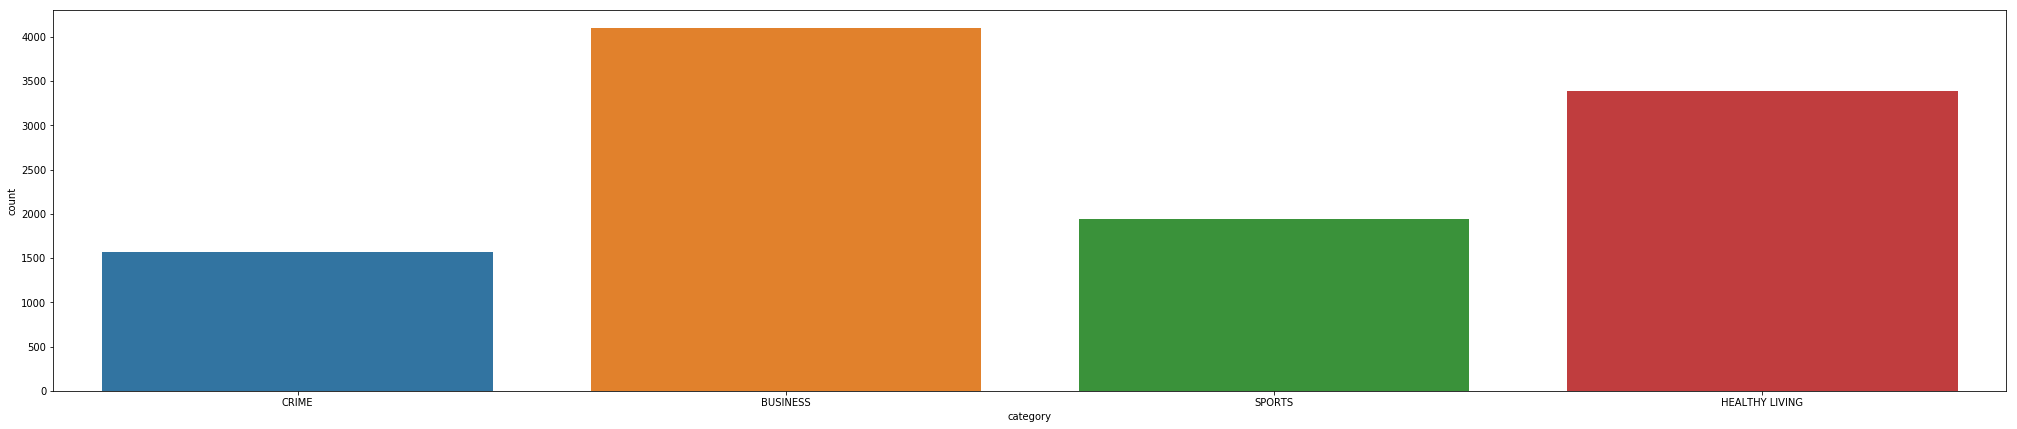

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(35,7))
sns.countplot(x = 'category', data = df33)

### Cleaning 

In [ ]:
# clean the words now 

In [222]:
df33.text

AttributeError: 'DataFrame' object has no attribute 'text'

In [243]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``','.','$',',']
stopwords_list += list(string.punctuation)

In [236]:
stopwords_list += ["''", '""', '...', '``','.','$',',']


In [237]:
stopwords_list += list(string.punctuation)

In [244]:
tokens = df33['summary'].apply(word_tokenize)


In [245]:
stopwords_removed = [token for token in tokens if token not in stopwords_list]


In [246]:
stopwords_removed

[['There',
  'Were',
  'Mass',
  'Shootings',
  'In',
  'Texas',
  'Last',
  'Week',
  ',',
  'But',
  'Only',
  'On',
  'TV',
  'She',
  'left',
  'her',
  'husband',
  '.',
  'He',
  'killed',
  'their',
  'children',
  '.',
  'Just',
  'another',
  'day',
  'in',
  'America',
  '.'],
 ['Rachel',
  'Dolezal',
  'Faces',
  'Felony',
  'Charges',
  'For',
  'Welfare',
  'Fraud',
  'State',
  'prosecutors',
  'say',
  'almost',
  '$',
  ',',
  'had',
  'been',
  'deposited',
  'into',
  'her',
  'bank',
  'account',
  'while',
  'she',
  'was',
  'receiving',
  'public',
  'assistance',
  '.'],
 ['Man',
  'Faces',
  'Charges',
  'After',
  'Pulling',
  'Knife',
  ',',
  'Stun',
  'Gun',
  'On',
  'Muslim',
  'Students',
  'At',
  'McDonald',
  "'s",
  '“',
  'We',
  'thought',
  'we',
  'were',
  'going',
  'to',
  'die',
  ',',
  "''",
  'one',
  'of',
  'the',
  'students',
  'said',
  '.'],
 ['U.S.',
  'Launches',
  'Auto',
  'Import',
  'Probe',
  ',',
  'China',
  'Vows',
  'To',
 

In [ ]:
# need to remove  $ . : ; and lemmatize 

In [248]:
from nltk.stem.wordnet import WordNetLemmatizer

In [249]:
lemmatizer = WordNetLemmatizer()

In [251]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [267]:
lemmatizer.lemmatize(stopwords_removed)

TypeError: unhashable type: 'list'

In [258]:
for i in xrange(0,len(stopwords_removed)):
    lemmer=lemmatizer.lemmatize(stopwords_removed[i])
    

NameError: name 'xrange' is not defined

### Checkpoint

In [271]:
lemmatized_words = [lemmatizer.lemmatize(x) for x in flat_list]
#(lemmatized_words)

In [ ]:
# It works ! had to make into 1 list first. 
#can probably remove punctiation now as well 

In [270]:
import nltk
stopwords_removed
WNlemma = nltk.WordNetLemmatizer()
refined_list = [WNlemma.lemmatize(t, pos='v') for t in stopwords_removed]
print(refined_list)

TypeError: unhashable type: 'list'

In [264]:
flat_list = [item for stopwords_removed in l for item in stopwords_removed]



NameError: name 'l' is not defined

In [265]:
flat_list = []
for sublist in stopwords_removed:
    for item in sublist:
        flat_list.append(item)

In [266]:
flat_list

['There',
 'Were',
 'Mass',
 'Shootings',
 'In',
 'Texas',
 'Last',
 'Week',
 ',',
 'But',
 'Only',
 'On',
 'TV',
 'She',
 'left',
 'her',
 'husband',
 '.',
 'He',
 'killed',
 'their',
 'children',
 '.',
 'Just',
 'another',
 'day',
 'in',
 'America',
 '.',
 'Rachel',
 'Dolezal',
 'Faces',
 'Felony',
 'Charges',
 'For',
 'Welfare',
 'Fraud',
 'State',
 'prosecutors',
 'say',
 'almost',
 '$',
 ',',
 'had',
 'been',
 'deposited',
 'into',
 'her',
 'bank',
 'account',
 'while',
 'she',
 'was',
 'receiving',
 'public',
 'assistance',
 '.',
 'Man',
 'Faces',
 'Charges',
 'After',
 'Pulling',
 'Knife',
 ',',
 'Stun',
 'Gun',
 'On',
 'Muslim',
 'Students',
 'At',
 'McDonald',
 "'s",
 '“',
 'We',
 'thought',
 'we',
 'were',
 'going',
 'to',
 'die',
 ',',
 "''",
 'one',
 'of',
 'the',
 'students',
 'said',
 '.',
 'U.S.',
 'Launches',
 'Auto',
 'Import',
 'Probe',
 ',',
 'China',
 'Vows',
 'To',
 'Defend',
 'Its',
 'Interests',
 'The',
 'investigation',
 'could',
 'lead',
 'to',
 'new',
 'U.S.',